TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

In [48]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

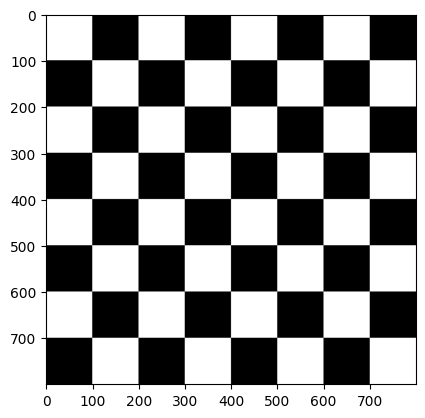

In [52]:

ancho = 800
alto = 800

# Creación del tablero
tablero = np.zeros((alto, ancho, 3), dtype = np.uint8)

# Recorrido del tablero
for i in range(0, ancho):
    for j in range(0,alto):
        if (i//100 + j//100) % 2 == 0: # esto sirve para saber si es par
          tablero[i, j] = (255, 255, 255) # se pinta de blanco en posciones pares 

plt.imshow(tablero)
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

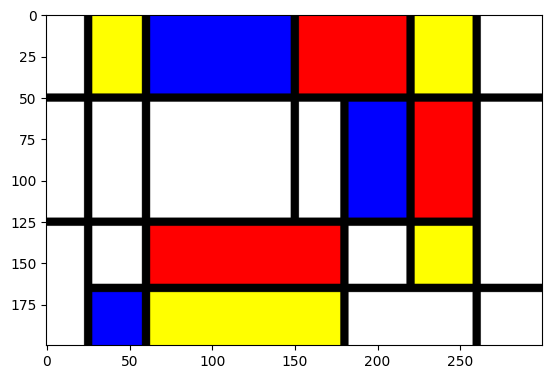

In [ ]:
ancho = 300
alto = 200

mondrian = np.zeros((200, 300, 3), dtype = np.uint8)

mondrian[:,:,0] = 255 
mondrian[:,:,1] = 255
mondrian[:,:,2] = 255 



# Colores 
rojo = (255, 0, 0)
amarillo = (255, 255, 0)
azul = (0,0,255)

# Rellenos
cv2.rectangle(mondrian, (25,0), (60,50), amarillo, -1)
cv2.rectangle(mondrian, (60,0), (150,50), azul, -1)
cv2.rectangle(mondrian, (150,0), (220,50), rojo, -1)
cv2.rectangle(mondrian, (220,0), (260,50), amarillo, -1)
cv2.rectangle(mondrian, (180,50), (220,125), azul, -1)
cv2.rectangle(mondrian, (220,50), (260,125), rojo, -1)
cv2.rectangle(mondrian, (60,125), (180,165), rojo, -1)
cv2.rectangle(mondrian, (220,125), (260,165), amarillo, -1)
cv2.rectangle(mondrian, (25,165), (60,alto), azul, -1)
cv2.rectangle(mondrian, (60,165), (180,alto), amarillo, -1)
# Líneas verticales
cv2.line(mondrian, (int(ancho/2), 0),(int(ancho/2), 125), (0,0,0) ,4)
cv2.line(mondrian, (25, 0),(25, alto), (0,0,0) ,4)
cv2.line(mondrian, (60, 0),(60, alto), (0,0,0) ,4)
cv2.line(mondrian, (260, 0),(260, alto), (0,0,0) ,4)
cv2.line(mondrian, (220, 0),(220, 165), (0,0,0) ,4)
cv2.line(mondrian, (180, 50),(180, alto), (0,0,0) ,4)

# Líneas horizontales
cv2.line(mondrian, (0, 50),(ancho, 50), (0,0,0) ,4)
cv2.line(mondrian, (0, 125),(260, 125), (0,0,0) ,4)
cv2.line(mondrian, (25, 165),(ancho, 165), (0,0,0) ,4)
plt.imshow(mondrian)
plt.show()


TAREA: Modifica de forma libre los valores de un plano de la imagen

In [54]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
       #  canal azul
        b = frame[:,:,0]
        b_color = np.zeros_like(frame)
        b_color[:,:,0]= b #separo los canales y luego le pongo el color real
       # canal verde 
        g = frame[:,:,1]
        g_color = np.zeros_like(frame)
        g_color[:,:,1]= g
        
        # rojo invertido
        r = frame[:,:,2]
        r_mod = 255 - r
        r_color_mod = np.zeros_like(frame)
        r_color_mod[:,:,2]= r_mod #inivierto especificamente el color rojo
        #Dimensiones imagen de entrada
        h, w, c = frame.shape
        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r_color_mod,g_color, b_color)) # pega imagenes 
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [ ]:

B = frame[:,:, 0]
G = frame[:, :, 1]
R = frame[:, :, 2]  
# Almacena valores del evento

vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Convertir a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Tamaño del bloque
    block_size = 8
    h, w = gray.shape

    # Redimensionar a bloques 8x8 promediados
    small = cv2.resize(gray, (w // block_size, h // block_size), interpolation=cv2.INTER_AREA)

    # Encontrar min y max en la imagen reducida
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(small)

    # Escalar coordenadas de vuelta a la imagen original
    minLoc = (minLoc[0] * block_size, minLoc[1] * block_size)
    maxLoc = (maxLoc[0] * block_size, maxLoc[1] * block_size)

    # Dibujar rectángulos 8x8
    cv2.rectangle(frame, minLoc, (minLoc[0]+block_size, minLoc[1]+block_size), (255,0,0), 2)  # más oscuro
    cv2.rectangle(frame, maxLoc, (maxLoc[0]+block_size, maxLoc[1]+block_size), (0,0,255), 2)  # más claro

    cv2.imshow('Cam', frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [55]:
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Forzar a mitad de resolución
w = int(w/2)
h = int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Imagen conjunta 2x original
collage = np.zeros((h*2, w*2, 3), dtype=np.uint8)
tl = collage[0:h, 0:w]
tr = collage[0:h, w:w+w]
bl = collage[h:h+h, 0:w]
br = collage[h:h+h, w:w+w]

while True:
    ret, frameIN = vid.read()

    # Reducir tamaño
    frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)

    if ret:
        # Versión 1: en grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

        # Versión 2: invertida
        invertida = cv2.bitwise_not(frame)

        # Versión 3: bordes tipo cómic
        edges = cv2.Canny(frame, 100, 200)
        edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

        # Versión 4: colores locos (colormap)
        pop = cv2.applyColorMap(frame, cv2.COLORMAP_JET)

        # Pegar en el collage
        tl[:,:,:] = gray
        tr[:,:,:] = invertida
        bl[:,:,:] = edges
        br[:,:,:] = pop

        # Mostrar collage
        cv2.imshow('Pop Art Collage', collage)

    # Detener con ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar cámara
vid.release()
cv2.destroyAllWindows()        # mapa de colores llamativo

